<a href="https://colab.research.google.com/github/Dhanalaxmi3103/BharatIntern/blob/DataScience/Task_1_SMS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Loading dataset
ds=pd.read_csv("spam.csv",encoding="latin-1")
ds.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [ ]:
ds.shape

(5572, 5)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Removing NaN value columns i.e Unnamed: 2,Unnamed: 3,Unnamed: 4
ds=ds.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
ds.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Renaming column v1 as Info and column v2 as Messages
ds=ds.rename(columns={'v1':'Info','v2':'Messages'})
ds.head()

,Info,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()


In [ ]:
ds['Info']=encode.fit_transform(ds['Info'])
ds.head()

,Info,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
ds.isnull().sum()

Info        0
Messages    0
dtype: int64

In [ ]:
ds.duplicated().sum()

403

In [ ]:
ds=ds.drop_duplicates(keep='first')

In [ ]:
ds.duplicated().sum()

0

In [ ]:
ds.shape

(5169, 2)

In [ ]:
ds['Info'].value_counts()

Info
0    4516
1     653
Name: count, dtype: int64

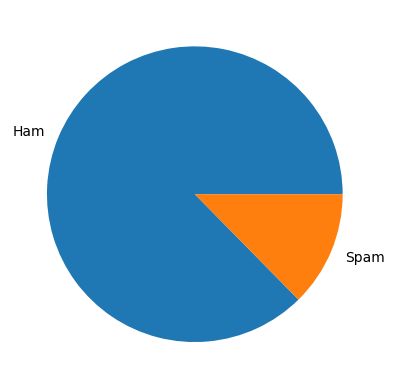

In [ ]:
import matplotlib.pyplot as plt
plt.pie(ds['Info'].value_counts(),labels=['Ham','Spam'])
plt.show()

In [ ]:
stopWords=set(stopwords.words("english"))
#defining function to clean the messages
def cleaning(text):
  # converting to lower case
  text=text.lower()
  #removing special characters
  text=re.sub(r'[^0-9a-zA-Z]', ' ',text)
  #removing extra spaces
  text=re.sub(r'\s+', ' ',text)
  #removing stopwords
  text=' '.join(word for word in text.split() if word not in stopWords)
  return text

In [ ]:
#cleaning messages
ds['cleaning']=ds['Messages'].apply(cleaning)
ds.head()

,Info,Messages,cleaning
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [ ]:
#splitting data for training
x=ds['cleaning']
y=ds['Info']

In [ ]:
#MODEL TRAINING
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

def classifier(model,x,y):
  #train test split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True,stratify=y)
  #Training model
  pipeline_model=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clif',model)])

  pipeline_model.fit(x_train,y_train)

  print("ACCURACY FOR",model,'IS ',pipeline_model.score(x_test,y_test)*100,'\n')

  y_predict=pipeline_model.predict(x_test)

  print(classification_report(y_test,y_predict))

#LOGISTIC REGRESSION
print("*****LOGISTIC REGRESSION*****\n")
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classifier(model,x,y)

#NAIVE BAYES CLASSIFICATION
print("\n*****NAIVE BAYES CLASSIFICATION*****\n")
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
classifier(model,x,y)

#SUPPORT VECTOR MACHINE
print("\n*****SUPPORT VECTOR MACHINE*****\n")
from sklearn.svm import SVC
model=SVC()
classifier(model,x,y)

#RANDOM FOREST CLASSIFICATION
print("\n*****RANDOM FOREST CLASSIFICATION*****\n")
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classifier(model,x,y)

#DECISION TREE CLASSIFICATION
print("\n*****DECISION TREE CLASSIFICATION*****\n")
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classifier(model,x,y)

#K-NEIGHBOURS CLASSIFICATION
print("\n*****K-NEIGHBOURS CLASSIFICATION*****\n")
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classifier(model,x,y)


*****LOGISTIC REGRESSION*****

ACCURACY FOR LogisticRegression() IS  95.7463263727765 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1130
           1       0.99      0.67      0.80       163

    accuracy                           0.96      1293
   macro avg       0.97      0.83      0.89      1293
weighted avg       0.96      0.96      0.95      1293


*****NAIVE BAYES CLASSIFICATION*****

ACCURACY FOR MultinomialNB() IS  96.13302397525135 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1130
           1       1.00      0.69      0.82       163

    accuracy                           0.96      1293
   macro avg       0.98      0.85      0.90      1293
weighted avg       0.96      0.96      0.96      1293


*****SUPPORT VECTOR MACHINE*****

ACCURACY FOR SVC() IS  97.29311678267595 

              precision    recall  f1-score   support

           0       0.97      1.00